In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#load the data
df = pd.read_csv('data.csv', index_col= 'id')
df.head(70)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859283,M,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,...,33.39,114.60,925.1,0.1648,0.34160,0.30240,0.16140,0.3321,0.08911,NaN
859464,B,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,...,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211,NaN
859465,B,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,...,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641,NaN


In [13]:
df.index.unique()

Int64Index([  842302,   842517, 84300903, 84348301, 84358402,   843786,
              844359, 84458202,   844981, 84501001,
            ...
              925291,   925292,   925311,   925622,   926125,   926424,
              926682,   926954,   927241,    92751],
           dtype='int64', name='id', length=569)

In [13]:
#count the number of rows and columns in the data
df.shape  #there are 369 rows and 33 column..... and the number of rows is the number of patients 
#so there  are on 369 patients 

(569, 33)

In [19]:
#count the number of empty (NAN,NAN, na) values in each column

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [69]:
#drop the column with all missing values

df = df.dropna(axis=1) #drop all of the columns with empty values 


In [23]:
#get the new count of the number of rows and columns
df.shape

(569, 32)

In [24]:
#Get a count of the number of Mallignant (M ) or Benign (B ) cells
df['diagnosis'].value_counts()   #using value_counts() to get the number of counts

B    357
M    212
Name: diagnosis, dtype: int64

In [66]:
df['perimeter_mean'].value_counts()

82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

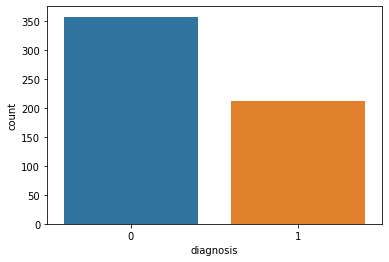

In [70]:
#to visualize the count use the seaborn lib
sns.countplot(df['diagnosis'], label='count')

In [26]:
#to look at the datatype so see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [29]:
#encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values) #this is printing the encoded values 
#this means, get all of the rows and get the data from column diagnosis which is at index one

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [56]:
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)  
#this is a code that creates the variable for the operations on the diagnosis and on all the rows
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

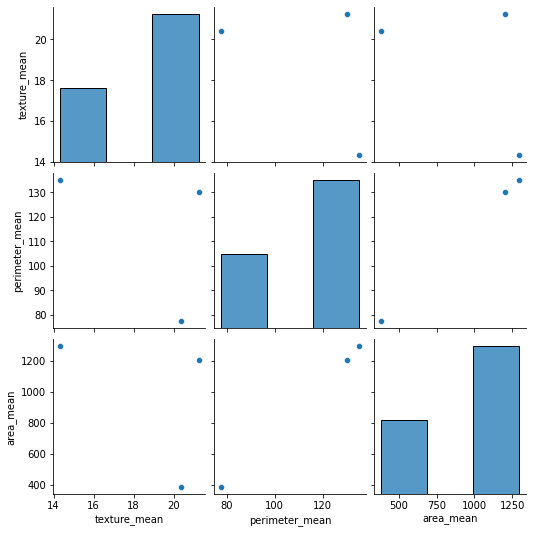

In [73]:
#create a pair plot
sns.pairplot(df.iloc[2:5, 3:6])  #THESE ARE PLOTS AGAINST EACHOTHER

In [74]:
df.iloc[2:5, 3:6] 
#### So what this means is that i selected three patients which is declared when i wrote 2:5
### And then, the features i considered are texture_mean, perimeter_mean and area_mean when i wrote 3:6

### then plotted a pair plot against three of the cases

,texture_mean,perimeter_mean,area_mean
2,21.25,130.00,1203.0
3,20.38,77.58,386.1
4,14.34,135.10,1297.0


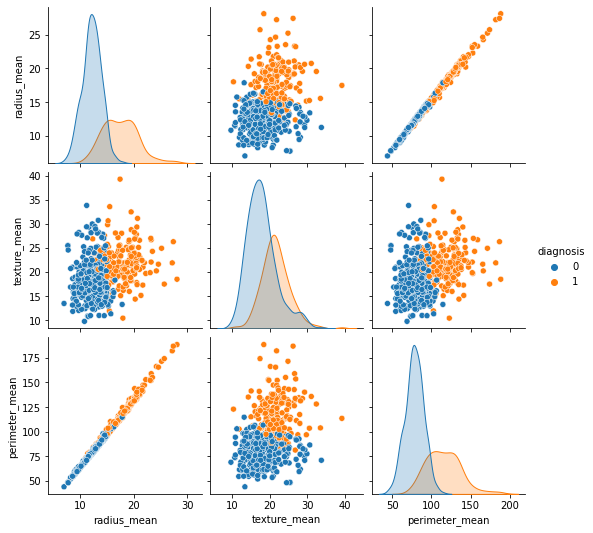

In [77]:
### following the project
sns.pairplot(df.iloc[:, 1:5], hue = 'diagnosis')

In [46]:
df.iloc[:, :3+1]

array([[842302, 'M', 17.99, 10.38],
       [842517, 'M', 20.57, 17.77],
       [84300903, 'M', 19.69, 21.25],
       ...,
       [926954, 'M', 16.6, 28.08],
       [927241, 'M', 20.6, 29.33],
       [92751, 'B', 7.76, 24.54]], dtype=object)

In [30]:
df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [38]:
df.iloc[65:70, 4:]

,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
65,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,0.3577,1.2810,...,17.31,33.39,114.60,925.1,0.1648,0.34160,0.30240,0.16140,0.3321,0.08911
66,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,0.2351,2.0110,...,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211
67,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,0.2727,0.9429,...,12.33,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
68,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,...,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750
69,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,0.2368,0.8732,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.10390,0.05882,0.2383,0.06410


In [72]:
from sklearn.preprocessing import MultilabelBinarizer
y = [[2,3,4], [2], [0,1,3], [0,1,2,3,4], [0,1,2]]

MultiLabelBinarizer().fit_transform(y)


ImportError: cannot import name 'MultilabelBinarizer' from 'sklearn.preprocessing' (C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\__init__.py)